# Aplicando machine learning em uma situação de problema no coração

Com este dataset o intui é fazer se o modelo acerta quem tem mais propensão a ter problemas cardivasculares ou não. Neste primeiro momento faremos a visualização dos dados para entender melhor o texto e em seguida partir para o machine learning.

In [29]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
import pandas_profiling as ProfileReport

O dataset utilizado pode ser utilizado neste [link](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data)

In [30]:
# Importando o dataset
heart = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [31]:
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Dicionário dos dados

Para o melhor entendimento, segue o dicionários dos dados:


- **age**: Idade
- **anaemia**: Diminuição de glóbulos vermelhos ou hemoglobina (booleano).
- **creatinine_phosphokinase**: nivel da enzima CPK no sangue (mcg/L)
- **diabetes** : Se o paciente ja teve diabetes (boleano).
- **ejection_fraction**: porcentagem do sangue que que está saindo do coração a cada contração (porcentagem).
- **high_blood_pressure**: se o paciente tem hipertensão (boleano).
- **platelets**: Platelets no sangue (kiloplatelets/mL).
- **serum_creatinine**: nivel de  serum creatinine no sangue (mg/dL).
- **serum_sodium**: nivel de serum sodio no sangue (mg/dL).
- **sex**: homem ou mulher (boleano).
- **smoking**: se fuma (boleano)
- **time**: periodo de acompanhamento (dias).
- **DEATH_EVENT**: Paciente faleceu durante o periode de acompanhamento (boleano).

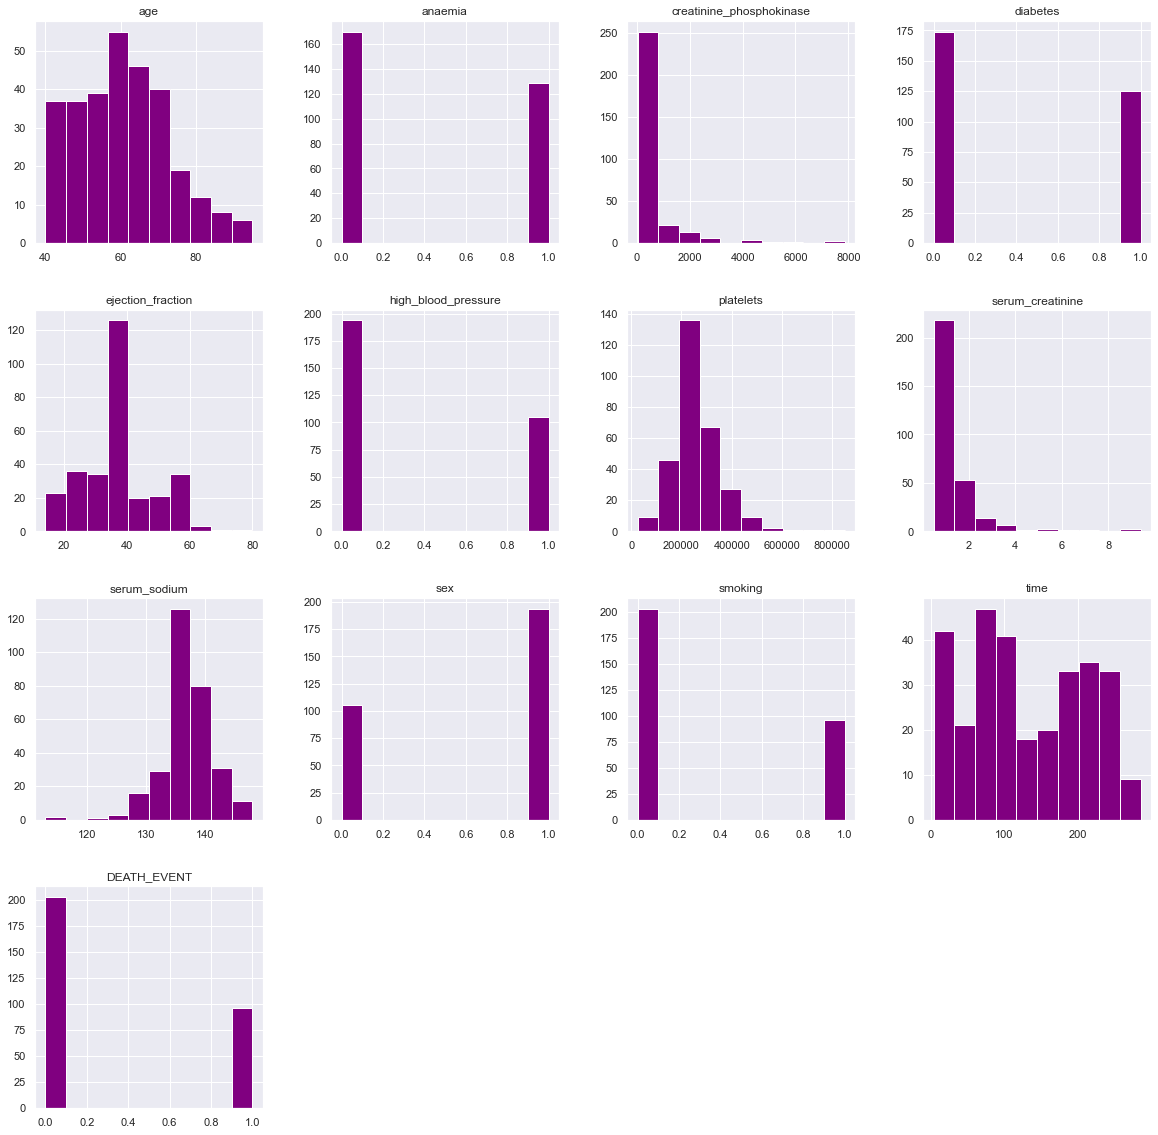

In [32]:
# Olhando como os dados estão se comportando com um simple histograma
sns.set(style='darkgrid',rc={'figure.figsize':(20,20)})
heart.hist(color='purple');

Temos então que temos pacientes de varias idades e a maioria das variaveis são boleanas, maz o que chamou a atenção é a variavel target, em que temos mais pessoas que não faleceram do que faleceram, o que pode enviesar o modelo que poderemos aplicar, para ver melhor, vejamos o gráfico de pizza abaixo:

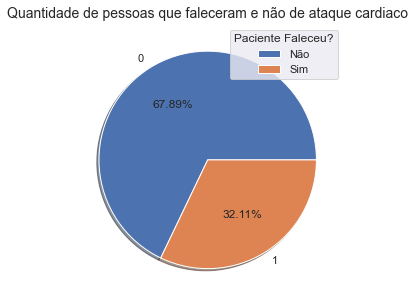

In [33]:
plt.figure(figsize=(10,5))
plt.title('Quantidade de pessoas que faleceram e não de ataque cardiaco',fontsize=14)
plt.pie(heart['DEATH_EVENT'].value_counts(),shadow=True,
        labels=heart['DEATH_EVENT'].value_counts().index,
        autopct='%1.2f%%')
plt.gca().legend(('Não','Sim'),title='Paciente Faleceu?');

Podemos ver que praticamente metade das pessoas do dataset são de pessoas q não sofreram de ataque, o que pode significar o envisamento dos dados em classificar mais em pessoas em que não sofrer de ataque cardiaco. Com isso iremos ver se o sexo influencia nas mortes

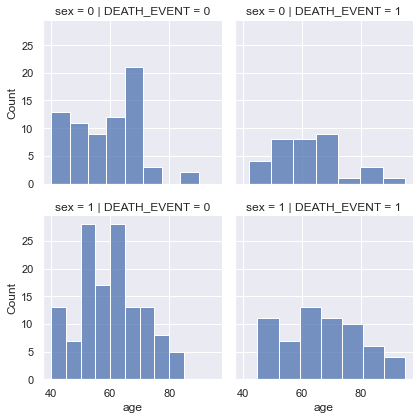

In [34]:
g = sns.FacetGrid(heart, row='sex', col='DEATH_EVENT')
g.map(sns.histplot,'age')

Podemos ver que o sexo influencia de certa forma , pois apartir de uma certa idade, tem uma certa diminuição dos casos no caso do sexo feminino.

Isso tem de certa a forma a ver com os trabalhos publicados, pois segundo Silva e Mantonani (2020) os fatores individuais que influenciam são:
*idade, sexo, nível de instrução,composição genética, tabagismo, hábitos alimentares, sedentarismo, nivel de colesterol no sangue e obesidade* (todas as referência estão listadas na refrências listados ao final deste notebook)

Agora vamos ver para nivel de colesterol

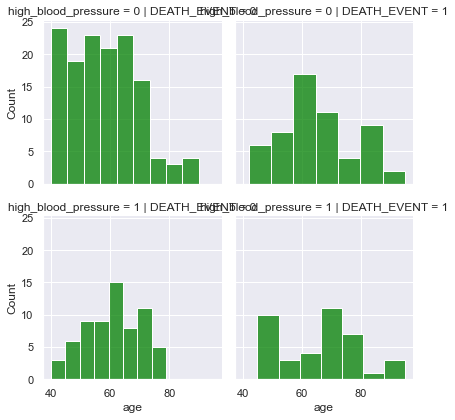

In [35]:
h = sns.FacetGrid(heart, row='high_blood_pressure', col='DEATH_EVENT')
h.map(sns.histplot,'age',color='green')

Parece que no sexo masculino, a partir de 80 anos quem teve colesterol alto, sofreu ataque cardiaco, e mulheres tem uma quantidade muito maior de quem e não sofreu do que e sofreu.

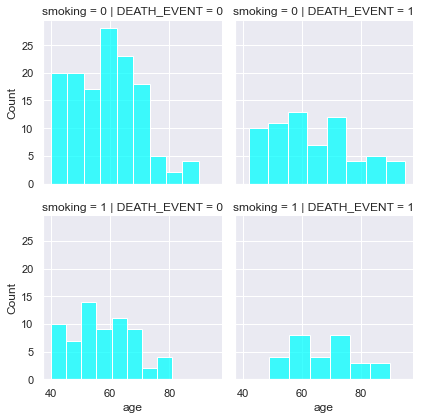

In [36]:
i = sns.FacetGrid(heart, row='smoking', col='DEATH_EVENT')
i.map(sns.histplot,'age',color='cyan')

In [37]:
heart.corr()['DEATH_EVENT']

age                         0.253729
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
ejection_fraction          -0.268603
high_blood_pressure         0.079351
platelets                  -0.049139
serum_creatinine            0.294278
serum_sodium               -0.195204
sex                        -0.004316
smoking                    -0.012623
time                       -0.526964
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

**Referências**

1 - Modelos de Machine Learning para tomada de decisão no sistema de saúde público brasileiro, Autores : Guilherme Ferreira da Silva e Daielly Melina Nassif Mantovani, 2020 (ano de publicação) pode ser acessado nesse [link](https://login.semead.com.br/23semead/anais/arquivos/1117.pdf?)